In [1]:
import os, sys, socket
import math
import numpy as np
import scipy
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import pynbody
import pynbody.analysis.gravity
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical


%config InlineBackend.figure_format ='retina'


In [2]:
matplotlib.rcParams['font.size'] = 16.0 # 22.0
matplotlib.rcParams['axes.labelsize'] = 18.0 
matplotlib.rcParams['legend.fontsize'] = 14.0 # 20.0

In [4]:
Msun_in_g = 1.989*10**33 # units: g
pc_in_m = 3.086*10**16 # 1 pc in meters
yr_in_s = 3.156*10**7 # 1 yr in seconds
km_in_m = 1e3

# Auxiliary functions

In [6]:
def probs_to_labels(pos_probs, threshold):
    
    return (pos_probs >= threshold).astype('float')



# Read example data for the MW GCs

In [77]:

MW = 


reading M31 C&R+16 catalog...
read  441  lines 

GC system v_sys = -296.2052256532067
number of objects with Vlos data:  421
GC v. dispersion = 148.37005774228933


/usr/local/lib64/python3.6/site-packages/numpy/lib/npyio.py:2313: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


final matched catalog has  421 objects
PAndAS-01  nan 5.3 -333.0 117.9 0.9721705964950879
PAndAS-02  nan 5.1 -266.0 113.7 0.9905673299411478
PAndAS-04  nan 5.2 -397.0 123.6 0.8698229581221188
PAndAS-05  nan 4.4 -183.0 99.5 0.9578692460227092
PAndAS-06  -2.1 5.6 -327.0 92.6 0.9930138843432704
PAndAS-07  -1.4 4.3 -452.0 84.9 0.9746048863730452
PAndAS-08  -1.4 4.5 -416.0 87.2 0.9305201151361795
PAndAS-09  nan 5.0 -444.0 89.8 0.9019949531017855
PAndAS-10  nan 4.5 -435.0 88.9 0.8966891927876196
PAndAS-11  nan 5.0 -447.0 82.2 0.9109307697185309
PAndAS-12  nan 4.5 -472.0 68.3 0.9508409217161279
PAndAS-13  nan 5.0 -570.0 67.0 0.9607192681704629
PAndAS-14  nan 5.2 -363.0 85.2 0.8183203574033271
PAndAS-15  nan 4.4 -385.0 51.1 0.9900834403769133
PAndAS-16  nan 5.7 -490.0 50.0 0.9465361828771351
HEC1       nan 4.8 -233.0 44.2 0.9908154165430696
MCGC1-B520 -2.1 5.7 -245.0 45.6 0.9391242017873133
PAndAS-17  -0.9 5.6 -279.0 53.1 0.8710662124335273
H2         nan 5.1 -519.0 40.9 0.9513536444028313
PAn

B169       0.3 5.6 -131.3 1.6 1.0203371531722778
B271       -1.2 5.4 -359.1 2.6 0.8197886911617073
B170-G221  -0.7 5.3 -291.3 5.9 0.6939732331617756
B272-V294  -0.9 5.3 -99.9 5.0 0.7133502349348759
B171-G222  -0.3 6.1 -267.5 1.7 1.0238605399138991
B172-G223  -0.6 5.5 -284.4 2.1 0.9167775951676151
B173-G224  -0.8 5.2 -316.8 2.4 0.8748494542316512
B174-G226  -1.0 6.2 -491.4 5.5 0.7074596063788788
B176-G227  -1.6 5.4 -533.4 6.3 0.7015632795569376
B177-G228  -1.2 4.9 -400.3 3.0 0.8276202764284587
B178-G229  -1.2 6.1 -148.9 2.3 0.9115808670705817
B179-G230  -1.0 6.0 -145.0 2.0 0.9966063747146419
B180-G231  -0.9 5.7 -196.7 2.7 0.8702869151094327
B181-G232  -0.5 5.4 -264.5 3.5 0.7969575774179133
H18        nan 5.5 -206.0 50.0 0.683573832686172
B182-G233  -1.0 6.2 -356.6 2.8 0.8923710059828689
B183-G234  -0.5 5.8 -185.7 3.9 0.7800675805618993
B185-G235  -0.6 6.0 -152.5 2.2 1.0182659995505339
B184-G236  0.1 5.3 -154.0 5.1 0.7376391229601464
B186       0.2 4.7 -119.2 5.1 0.7370886534104792
B187-

In [78]:
### check data format

MW

array([ nan,  nan,  nan,  nan, -2.1, -1.4, -1.4,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan, -2.1, -0.9,  nan,  nan,  nan,  nan,
       -1.9,  nan, -2.1, -2.1,  nan,  nan,  nan, -1. ,  nan, -1.6,  nan,
        nan,  nan, -1.8, -1.2, -1.9, -1.8, -1.7,  nan, -1.2, -1.8,  nan,
       -0.9, -1.5, -1.5,  nan, -0.7, -1.3, -1.1, -1.2, -1.4, -1. , -1.9,
       -1.2, -1. , -0.7, -2.2, -1.6,  nan, -0.7, -0.7, -0.5, -1.4, -0.8,
       -1.8, -1.7, -0.5, -0.1, -0.7, -2.5, -1.2, -0.8, -0.7, -0.8, -0.9,
       -1.1, -0.5, -1.8, -0.5, -0.7, -1.4, -0.9, -0.6, -1.4,  0.3, -1.3,
       -0.4, -2.5, -2.1, -0.3, -0.3, -0.5, -0.7, -1.6, -0.6, -1.1, -0.8,
       -0.8, -0.8, -1.7, -0.8, -0.9, -0.8, -1.6, -0.9, -1.1, -0.8, -1.6,
       -0.8, -0.8, -0.2, -0.1, -0.9,  0. , -2.1, -1.1, -1. , -1.8, -0.7,
       -0.8, -1.3, -0.9, -1. , -1.4, -0.2, -0.2, -0.6, -1.8, -1.9, -0.2,
       -0.6, -0.7, -1.5, -1.3, -0.2, -0.3, -1.3, -0.8, -1. , -1.4, -1.5,
       -2.8, -0.7, -1.1, -1.1, -1.7, -1.8, -1. , -1

# Test data

(0, 30)

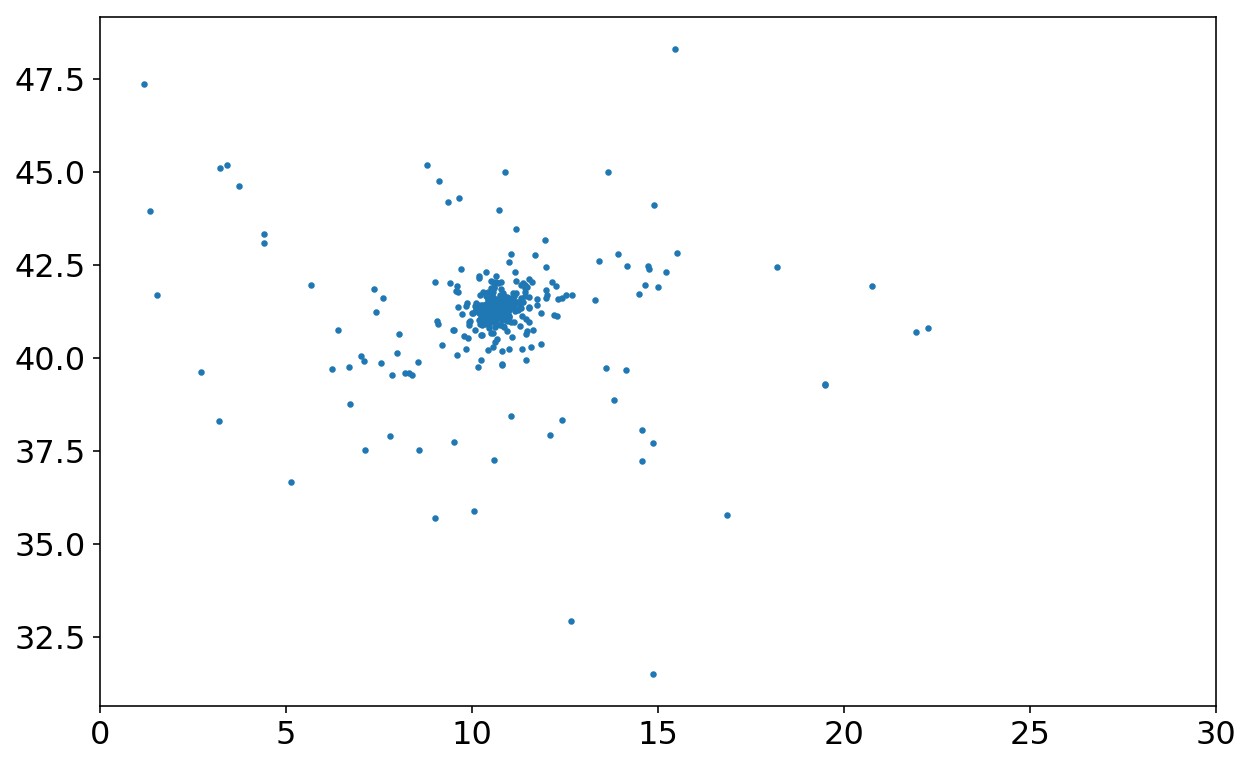

In [163]:
fig, ax = plt.subplots(1, 1, figsize= (10.0,10.0), sharex = True, sharey= True)

ax.scatter(angle[:,0], angle[:,1], s=5)

ax.set_aspect("equal") 

ax.set_xlim(0,30)

(-25, 25)

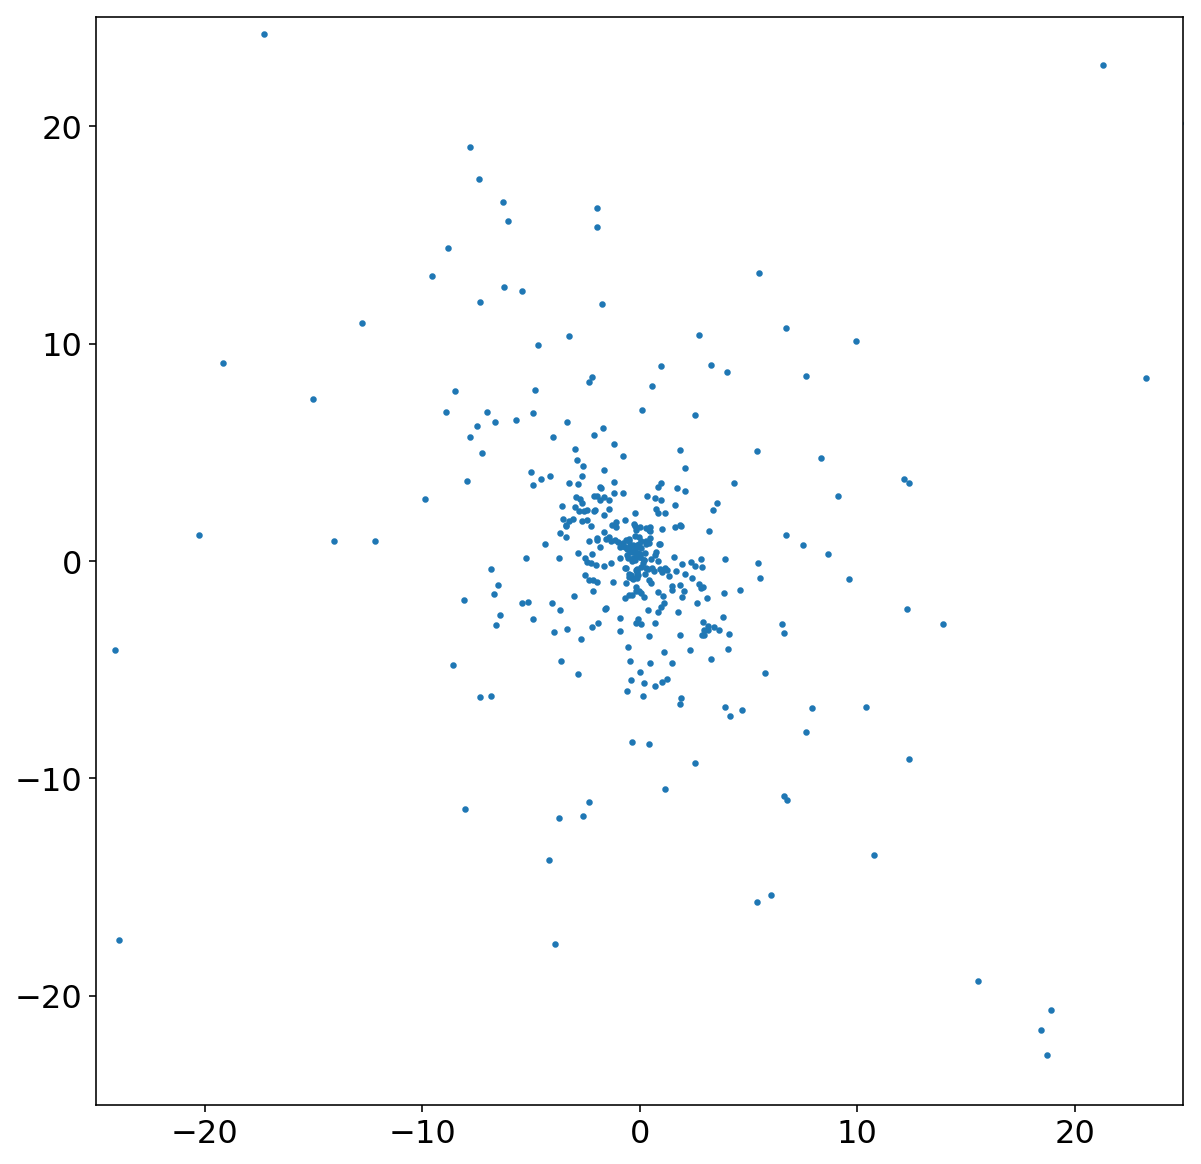

In [189]:
fig, ax = plt.subplots(1, 1, figsize= (10.0,10.0), sharex = True, sharey= True)

ax.scatter(pos[:,0], pos[:,1], s=5)

ax.set_aspect("equal") 

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

(-25, 25)

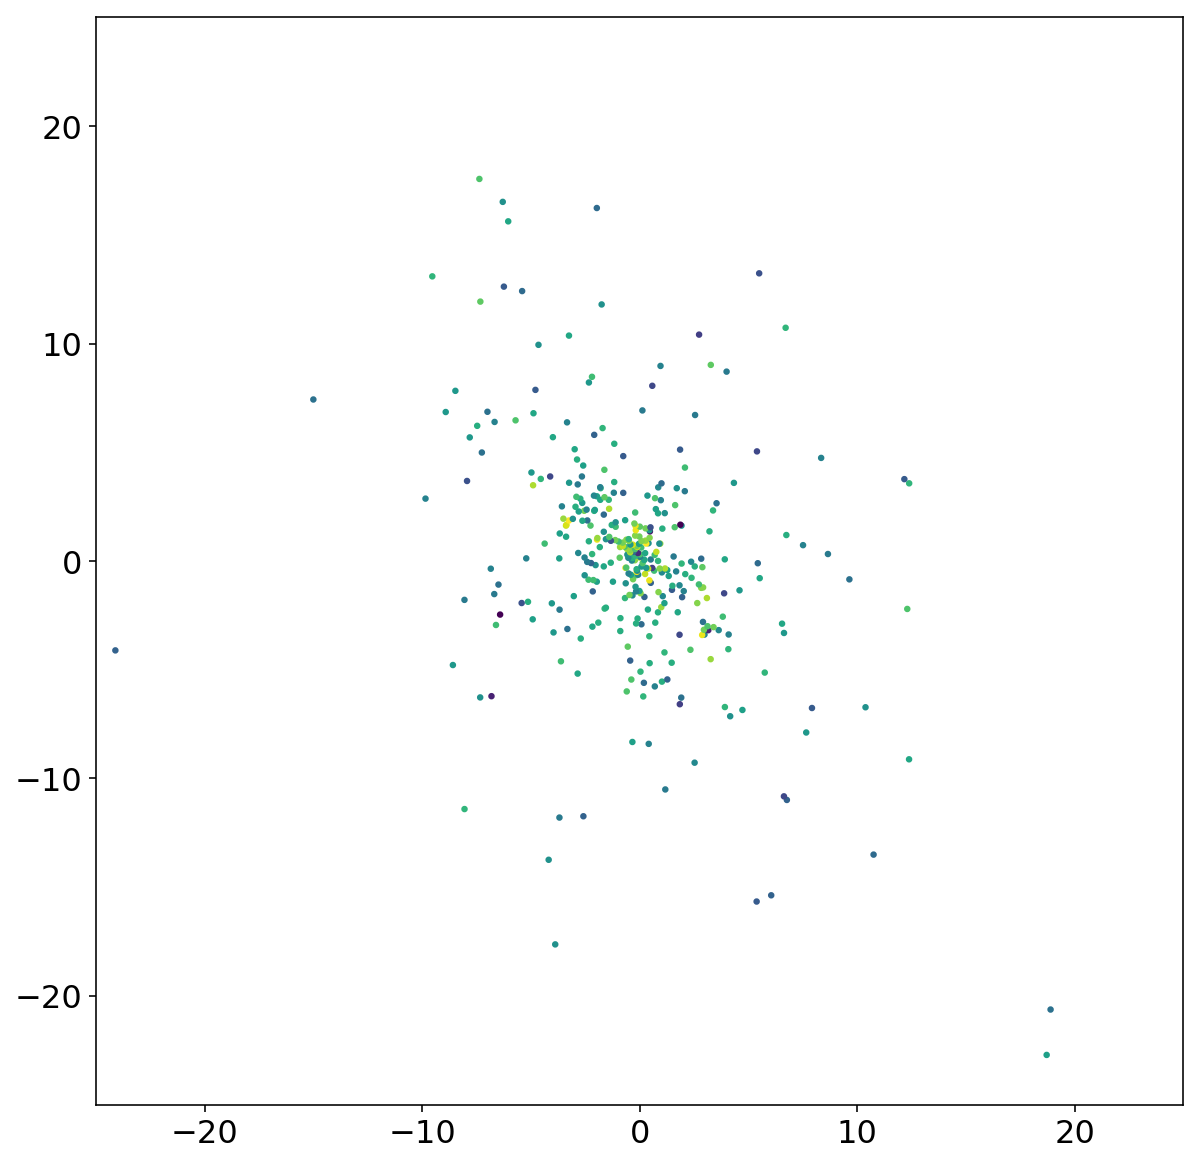

In [188]:
fig, ax = plt.subplots(1, 1, figsize= (10.0,10.0), sharex = True, sharey= True)

ax.scatter(pos[:,0], pos[:,1], c=met, s=5)

ax.set_aspect("equal") 

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

# Build galaxy features (global observables)

In [128]:
### define galaxy's global properties:

M31data_Mstar = 1.03e11/2 # [Msun] Sick+2015
M31data_Rhalf2D = 4.0  # [kpc] 
M31data_feh = 0.0    # Gregersen+2018
M31data_Ngc = 441.0/3  # C&R+16 cat.

M31data_vsys = -300.0 # McConnachie+2012
M31data_GCvdisp = 149.15  # see above

# Build GC features

In [130]:

M31_Mstar = []
M31_Rhalf2D = []
M31_feh = []
M31_Ngc = []
M31_gcvdisp = []

M31_gcid = []
M31_gcfeh = []
M31_gcrp = []
M31_gcvp = []
M31_gcx = []
M31_gcy = []


    
### get arrays of shape (NGCtot, Nfeatures) for each feature and (NGCtot, 1) for target:

print('igc  feh  rp   vp \n')

    
for igc in range(len(M31)):
    
    if np.isnan(M31.feh[igc]): continue
    if M31.feh[igc] <= -2.5 or M31.feh[igc] >= -0.5: continue

    M31_Mstar.append( M31data_Mstar )

    M31_Rhalf2D.append( M31data_Rhalf2D )
    
    M31_feh.append( M31data_feh )

    M31_Ngc.append( M31data_Ngc )

    M31_gcvdisp.append( M31data_GCvdisp ) # los GC system dispersion

    #print('   igc, age, feh, in:', igc, data['gc_age'][igal][igc], data['gc_feh'][igal][igc], data['gc_in'][igal][igc])

    M31_gcid.append( igc )

    M31_gcfeh.append( M31.feh[igc] )

    M31_gcrp.append( M31.R[igc] ) 

    M31_gcvp.append( M31.vlos[igc] - M31data_vsys )   # substract systemic velocity   
    
    M31_gcx.append( M31.x[igc] )
    
    M31_gcy.append( M31.y[igc] )

  
    print(f' {igc} {M31_gcfeh[-1]:.2f} {M31_gcrp[-1]:.2f} {M31_gcvp[-1]:.2f}')
        
    

M31_gcx = np.array(M31_gcx)
M31_gcy = np.array(M31_gcy)
M31_gcvp = np.array(M31_gcvp)



igc  feh  rp   vp 

 4 -2.10 92.60 -27.00
 5 -1.40 84.90 -152.00
 6 -1.40 87.20 -116.00
 16 -2.10 45.60 55.00
 17 -0.90 53.10 21.00
 22 -1.90 32.90 -68.00
 24 -2.10 31.30 -92.00
 25 -2.10 54.40 -171.00
 29 -1.00 34.20 -32.00
 31 -1.60 33.20 -49.30
 35 -1.80 77.40 -52.00
 36 -1.20 19.60 86.50
 37 -1.90 16.80 -31.00
 38 -1.80 17.00 -45.00
 39 -1.70 19.80 -115.30
 41 -1.20 16.10 97.60
 42 -1.80 14.00 -246.40
 44 -0.90 19.70 -66.60
 45 -1.50 13.90 103.60
 46 -1.50 10.60 -94.40
 48 -0.70 17.90 52.40
 49 -1.30 9.70 -105.30
 50 -1.10 13.10 -143.90
 51 -1.20 16.20 -104.30
 52 -1.40 8.50 61.90
 53 -1.00 8.60 96.30
 54 -1.90 12.90 -223.40
 55 -1.20 8.90 122.50
 56 -1.00 9.20 -129.50
 57 -0.70 8.30 96.70
 58 -2.20 6.90 -38.20
 59 -1.60 6.60 -81.40
 61 -0.70 6.30 -69.80
 62 -0.70 9.40 16.60
 64 -1.40 5.80 52.20
 65 -0.80 5.60 -23.20
 66 -1.80 5.60 138.30
 67 -1.70 5.70 -60.70
 70 -0.70 5.20 -88.40
 72 -1.20 13.40 21.50
 73 -0.80 4.90 -235.60
 74 -0.70 6.90 -172.90
 75 -0.80 4.70 77.90
 76 -0.90 7.

In [131]:
len(M31_gcfeh)

274

# Scale features to zero mean and unit standard deviation

In [132]:
import pickle

X_scaler = pickle.load(open("models/reduced_model_Xscaler.p", "rb"))

In [133]:

M31_Xtest = np.stack( ( 
                np.log10(M31_Mstar),
                np.log10(M31_Ngc), 
                np.log10(M31_Rhalf2D),
                M31_gcfeh, 
                np.asarray(M31_gcfeh) - np.asarray(M31_feh),
                np.log10(np.asarray(M31_gcrp)/np.asarray(M31_Rhalf2D)),    # projected radius
                np.log10(np.asarray(M31_gcrp)*abs(np.asarray(M31_gcvp))),     # projected L 
                        ),   
                axis=-1)



### Scale features:
M31_Xtest_scaled = X_scaler.transform(M31_Xtest)
print("Mean of Scaled Features: {}".format(np.mean(M31_Xtest_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(M31_Xtest_scaled)))



Mean of Scaled Features: -0.0059629086165104
Standard Deviation of Scaled Features: 0.6985972947477849


# Obtain predicted probabilities

In [134]:
# Load the saved model
model = load_model('models/best_model_reducedfeatures_MWtest.h5')
model.summary()


# make predictions on test data
M31predictions = model.predict(M31_Xtest_scaled)
M31features = M31_Xtest

# Calculate predicted probability of in-situ (second column)
M31predicted_prob_insitu = M31predictions[:,1]
M31predicted_prob_exsitu = M31predictions[:,0]



print('positive probabilities:', M31predicted_prob_insitu)



Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_315 (Dense)            (None, 10)                80        
_________________________________________________________________
dense_316 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_317 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_318 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_319 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_320 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_321 (Dense)            (None, 10)              

# Obtain predicted origin using probabilities and $P_{thresh}$

In [135]:

### predict M31 labels:

# get predicted labels and mask predictions above threshold:

best_thresh = 0.60


Ninit = len(M31predictions)
print('Full sample size:', Ninit)


### check accuracy of masked sample:

M31pred_insitu = probs_to_labels(M31predicted_prob_insitu, best_thresh)
M31pred_exsitu = probs_to_labels(M31predicted_prob_exsitu, best_thresh)


M31thresh_mask_in = M31predicted_prob_insitu >= best_thresh
M31thresh_mask_ex = M31predicted_prob_exsitu >= best_thresh
M31thresh_mask = M31thresh_mask_in + M31thresh_mask_ex
M31thresh_mask_amb = ~M31thresh_mask

Nsample = len(M31predictions[M31thresh_mask])
print('\n\nMasked sample size:', Nsample, ' amb:', len(M31predictions[M31thresh_mask_amb]))
print('fraction lost:', np.float(Nsample-Ninit)/Ninit)


print('\nmasked sample')
print('   probabilities:', M31predicted_prob_insitu[M31thresh_mask])
print('   predicted values:', M31pred_insitu[M31thresh_mask])
 

Full sample size: 274


Masked sample size: 191  amb: 83
fraction lost: -0.3029197080291971

masked sample
   probabilities: [0.09567264 0.12475765 0.12729073 0.17454335 0.1853621  0.22897407
 0.20745388 0.1363529  0.19104308 0.23106772 0.13290352 0.3577176
 0.2703845  0.27582905 0.25290254 0.26975524 0.38641483 0.33113658
 0.61158    0.28011286 0.64603466 0.3315335  0.6600864  0.6007342
 0.662078   0.37401327 0.61562634 0.63186026 0.6482843  0.61049986
 0.6477735  0.6141734  0.664934   0.3411801  0.6512393  0.6305971
 0.38913262 0.60526085 0.6428986  0.6385942  0.656647   0.66758907
 0.66639817 0.316078   0.63179946 0.680925   0.6320408  0.63209677
 0.68918556 0.32594624 0.60647774 0.6813356  0.6273126  0.67365193
 0.61265326 0.61621755 0.6085854  0.3507777  0.6498283  0.6932094
 0.6357244  0.61203426 0.66666365 0.7457635  0.34927666 0.67041904
 0.74026734 0.62089586 0.67904025 0.6913727  0.62994635 0.6800854
 0.6006458  0.7156662  0.63408273 0.623391   0.7384828  0.6367008
 0.8041171

# Spatial distribution of GC labeled by predicted origin


  total M31 test sample GCs: 421
   unmasked predicted in-situ fraction: 0.30403800475059384
   P: 128.0   N: 63.0



saving to file: projections_M31test.pdf


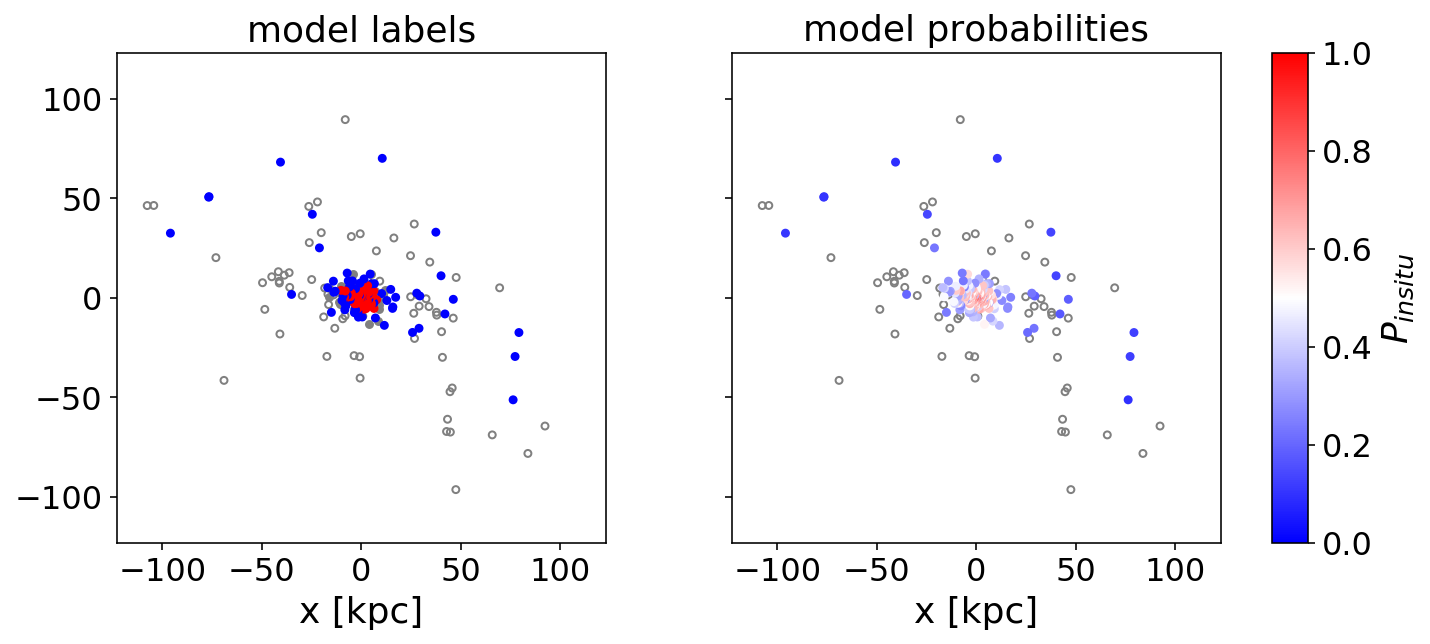

In [145]:
### MAKE PLOTS:


print('\n  total M31 test sample GCs:', len(M31))

print('   unmasked predicted in-situ fraction:', np.sum(M31pred_insitu)/float(len(M31) ) )
print('   P:', np.sum(M31pred_insitu[M31thresh_mask]), '  N:',np.sum(M31pred_exsitu[M31thresh_mask]) )
print('\n\n')


### plot GCs:

ptsize=12

fig, ax = plt.subplots(1, 2, figsize= (12.5,4.0), sharex = True, sharey= True)
ax = np.atleast_1d(ax)
ax = ax.ravel()

width=2.1*np.max(np.sqrt(M31.x**2 + M31.y**2))



# middle panel:  

s2 = ax[0].scatter(M31_gcx[M31thresh_mask], M31_gcy[M31thresh_mask], 
                   c=M31pred_insitu[M31thresh_mask], vmin=0, vmax=1, cmap='bwr', s=ptsize, zorder=2)

s3 = ax[0].scatter(M31_gcx[M31thresh_mask_amb], M31_gcy[M31thresh_mask_amb], 
                   c='grey', vmin=0, vmax=1, cmap='bwr', s=ptsize, zorder=0)

mask = (M31.feh<=-2.5) | (M31.feh>=-0.5) | (np.isnan(M31.feh)) 
ax[0].scatter(M31.x[mask], M31.y[mask], color='none', edgecolor='grey', s=ptsize, zorder=1, label='no pred.')

ax[0].set_xlim(-width/2, width/2)
ax[0].set_ylim(-width/2, width/2)
ax[0].set_aspect("equal")     
ax[0].set_xlabel("x [kpc]")

ax[0].set_title('model labels', fontsize=18)


# right panel:  

s2 = ax[1].scatter(M31_gcx, M31_gcy, 
                   c=M31predicted_prob_insitu, vmin=0, vmax=1, cmap='bwr', s=ptsize, zorder=1)

mask = (M31.feh<=-2.5) | (M31.feh>=-0.5) | (np.isnan(M31.feh)) 
ax[1].scatter(M31.x[mask], M31.y[mask], color='none', edgecolor='grey', s=ptsize, zorder=0, label='no pred.')


ax[1].set_xlim(-width/2, width/2)
ax[1].set_ylim(-width/2, width/2)
ax[1].set_aspect("equal")    

ax[1].set_xlabel("x [kpc]")

ax[1].set_title('model probabilities', fontsize=18)


### color bar:

fig.subplots_adjust(left = 0.1, top = 0.95, bottom = 0.1, wspace = 0.01, hspace = 0.1, right=0.78)

cbar_ax2 = fig.add_axes([0.775, 0.1, 0.02, 0.85])
cb2 = fig.colorbar(s2, cax=cbar_ax2)
cb2.set_label("$P_{insitu}$")




filename = 'projections_M31test.pdf'
print('saving to file:', filename)

plt.savefig('/home2/st/Projects/GC_origin/figures/'+filename, bbox_inches='tight')